In [1]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [2]:
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np
tf.__version__

'2.0.0'

In [0]:
num_classes = 10 # total classes (0-9 digits).

# Training parameters.
learning_rate = 0.001
training_steps = 200
batch_size = 128
display_step = 10

# Network parameters.
conv1_filters = 32 
conv2_filters = 64 
fc1_units = 1024 

In [4]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train / 255., x_test / 255.

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [0]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.c1 = layers.Conv2D(32, kernel_size=5, activation=tf.nn.relu)
        self.m1 = layers.MaxPooling2D((2,2), 2)

        self.c2 = layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu)
        self.m2 = layers.MaxPooling2D((2,2), 2)

        self.fl = layers.Flatten()

        self.fc1 = layers.Dense(1024)
        self.do = layers.Dropout(rate=0.5)

        self.out = layers.Dense(num_classes)
    
    def call(self, x, is_training=False):
        x = tf.reshape(x, [-1, 28, 28, 1])
        x = self.c1(x)
        x = self.m1(x)
        x = self.c2(x)
        x = self.m2(x)
        x = self.fl(x)
        x = self.fc1(x)
        x = self.do(x ,training=is_training)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

cnn = CNN()

In [0]:
def cross(x,y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits = x)
    return tf.reduce_mean(loss)

def acc(y_pred, y_true):
    corr = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(corr, tf.float32), axis=-1)

optimizer = tf.optimizers.Adam(learning_rate)

In [0]:
def run_opt(x,y):
    with tf.GradientTape() as g:
        pred = cnn(x, is_training=True)
        loss = cross(pred, y)
    trainable_vars = cnn.trainable_variables
    gradients = g.gradient(loss, trainable_vars)
    optimizer.apply_gradients(zip(gradients, trainable_vars))

In [42]:
for step, (x,y) in enumerate(train_data.take(training_steps), 1):
    run_opt(x,y)

    if step % display_step == 0:
        pred = cnn(x)
        loss = cross(pred, y)
        accu = acc(pred, y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, accu))

step: 10, loss: 1.860000, accuracy: 0.781250
step: 20, loss: 1.638139, accuracy: 0.890625
step: 30, loss: 1.567860, accuracy: 0.929688
step: 40, loss: 1.592945, accuracy: 0.914062
step: 50, loss: 1.562337, accuracy: 0.945312
step: 60, loss: 1.527845, accuracy: 0.968750
step: 70, loss: 1.503575, accuracy: 0.984375
step: 80, loss: 1.551828, accuracy: 0.945312
step: 90, loss: 1.526603, accuracy: 0.976562
step: 100, loss: 1.530127, accuracy: 0.968750
step: 110, loss: 1.518401, accuracy: 0.968750
step: 120, loss: 1.502111, accuracy: 0.976562
step: 130, loss: 1.481526, accuracy: 0.992188
step: 140, loss: 1.507723, accuracy: 0.968750
step: 150, loss: 1.514085, accuracy: 0.968750
step: 160, loss: 1.500094, accuracy: 0.976562
step: 170, loss: 1.504218, accuracy: 0.968750
step: 180, loss: 1.511420, accuracy: 0.968750
step: 190, loss: 1.496702, accuracy: 0.976562
step: 200, loss: 1.489289, accuracy: 0.984375


In [43]:
pred = conv_net(x_test)
print(accuracy(pred, y_test).numpy())

0.0917


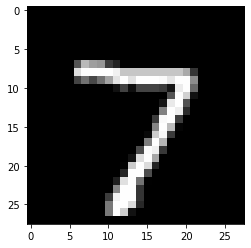

Model prediction: 3


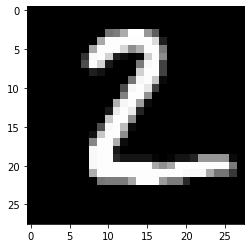

Model prediction: 4


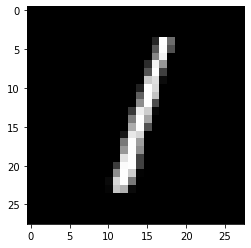

Model prediction: 2


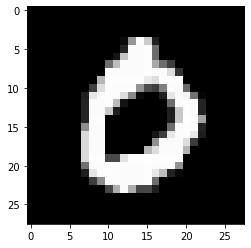

Model prediction: 3


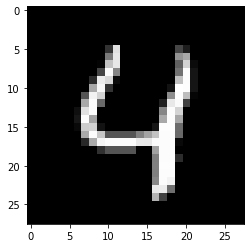

Model prediction: 2


In [44]:
import matplotlib.pyplot as plt

n_images = 5
test_images = x_test[:n_images]
predictions = conv_net(test_images)

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))